In [ ]:
# In this notebooke file EDA done on fraud check data


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [4]:
company_data = pd.read_csv("D:/Lecture file/25 th lecture 29 march/10. Random Forests/Company_Data.csv")
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


### EDA and Graph

In [9]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
 11  sales_cat    400 non-null    object 
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


In [11]:
sales_cat = []
for num in company_data['Sales']:
     if num <5 :
         sales_cat.append("Low")
     elif  num >= 5 and  num < 8 :
         sales_cat.append("Average")
     else:
         sales_cat.append("High")
company_data['sales_cat'] = sales_cat

In [13]:
company_data_drop = company_data.drop(columns =['Sales'])
company_data_drop

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_cat
0,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Average
4,141,64,3,340,128,Bad,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,139,23,3,37,120,Medium,55,11,No,Yes,Average
397,162,26,12,368,159,Medium,40,18,Yes,Yes,Average
398,100,79,7,284,95,Bad,50,12,Yes,Yes,Average


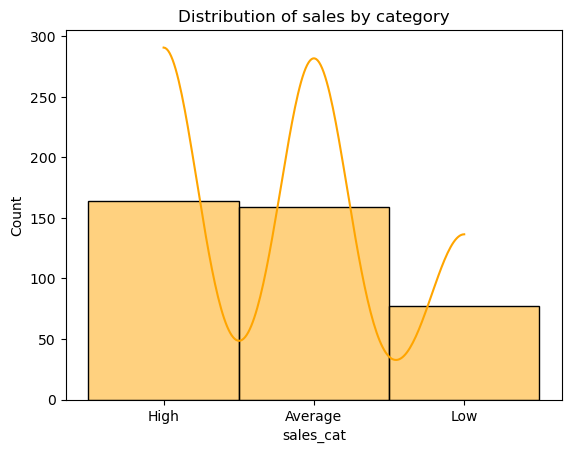

In [15]:
sns.histplot(company_data_drop['sales_cat'], bins=20, kde=True, color='orange',)
plt.title("Distribution of sales by category")
plt.savefig('D:/Distribution of sales by category.png')

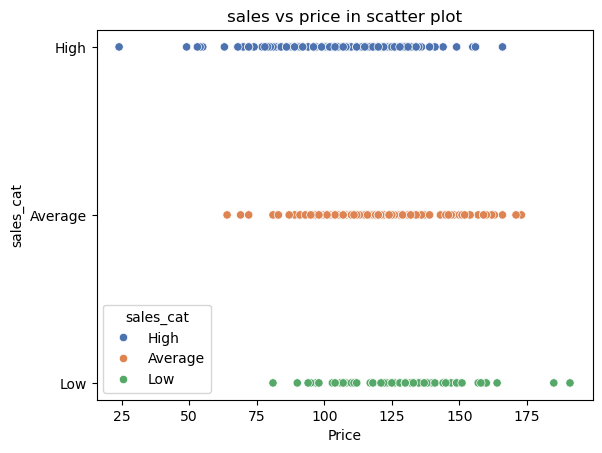

In [17]:
sns.scatterplot(data=company_data_drop, x='Price', y='sales_cat', hue='sales_cat', palette='deep')
plt.title("sales vs price in scatter plot")
plt.savefig('D:/sales vs price.png')

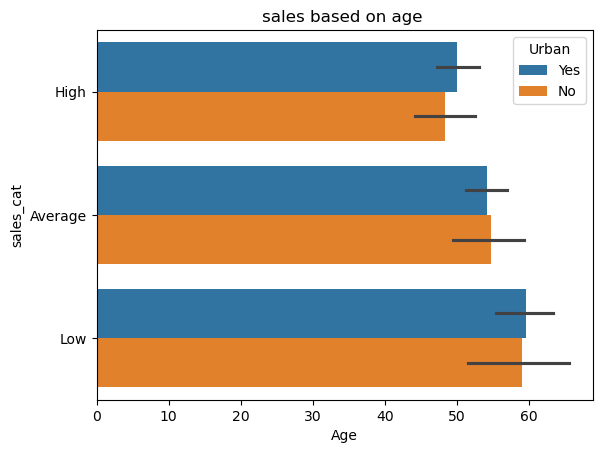

In [19]:
sns.barplot(x='Age' ,y ='sales_cat' ,hue ='Urban',data=company_data_drop)
plt.title("sales based on age ")
plt.savefig('D:/sales baes on age.png')
plt.show()

In [21]:
categories_data = company_data_drop.select_dtypes(include='object')
categories_data

,ShelveLoc,Urban,US,sales_cat
0,Bad,Yes,Yes,High
1,Good,Yes,Yes,High
2,Medium,Yes,Yes,High
3,Medium,Yes,Yes,Average
4,Bad,Yes,No,Low
...,...,...,...,...
395,Good,Yes,Yes,High
396,Medium,No,Yes,Average
397,Medium,Yes,Yes,Average
398,Bad,Yes,Yes,Average


In [25]:
le = LabelEncoder()
company_data_encoded = company_data_drop.copy()

for col in categories_data :
    company_data_encoded[col] = le.fit_transform(company_data_encoded[col])
company_data_encoded
    

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_cat
0,138,73,11,276,120,0,42,17,1,1,1
1,111,48,16,260,83,1,65,10,1,1,1
2,113,35,10,269,80,2,59,12,1,1,1
3,117,100,4,466,97,2,55,14,1,1,0
4,141,64,3,340,128,0,38,13,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,1
396,139,23,3,37,120,2,55,11,0,1,0
397,162,26,12,368,159,2,40,18,1,1,0
398,100,79,7,284,95,0,50,12,1,1,0


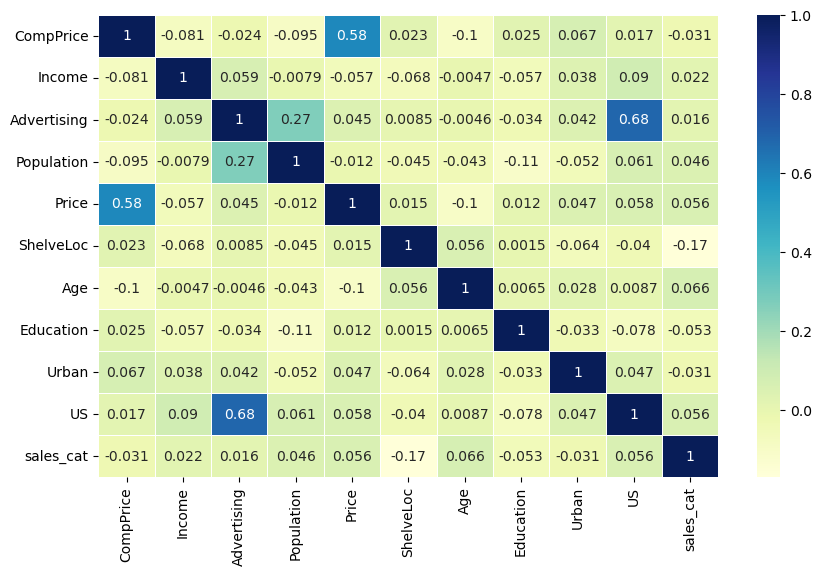

In [27]:
plt.figure(figsize=(10, 6))
ax=sns.heatmap(company_data_encoded.corr(numeric_only=True), annot=True, cmap='YlGnBu',linewidth=.5)
ax.set(xlabel="", ylabel="")
plt.savefig('D:/correlation plot(c_d).png')

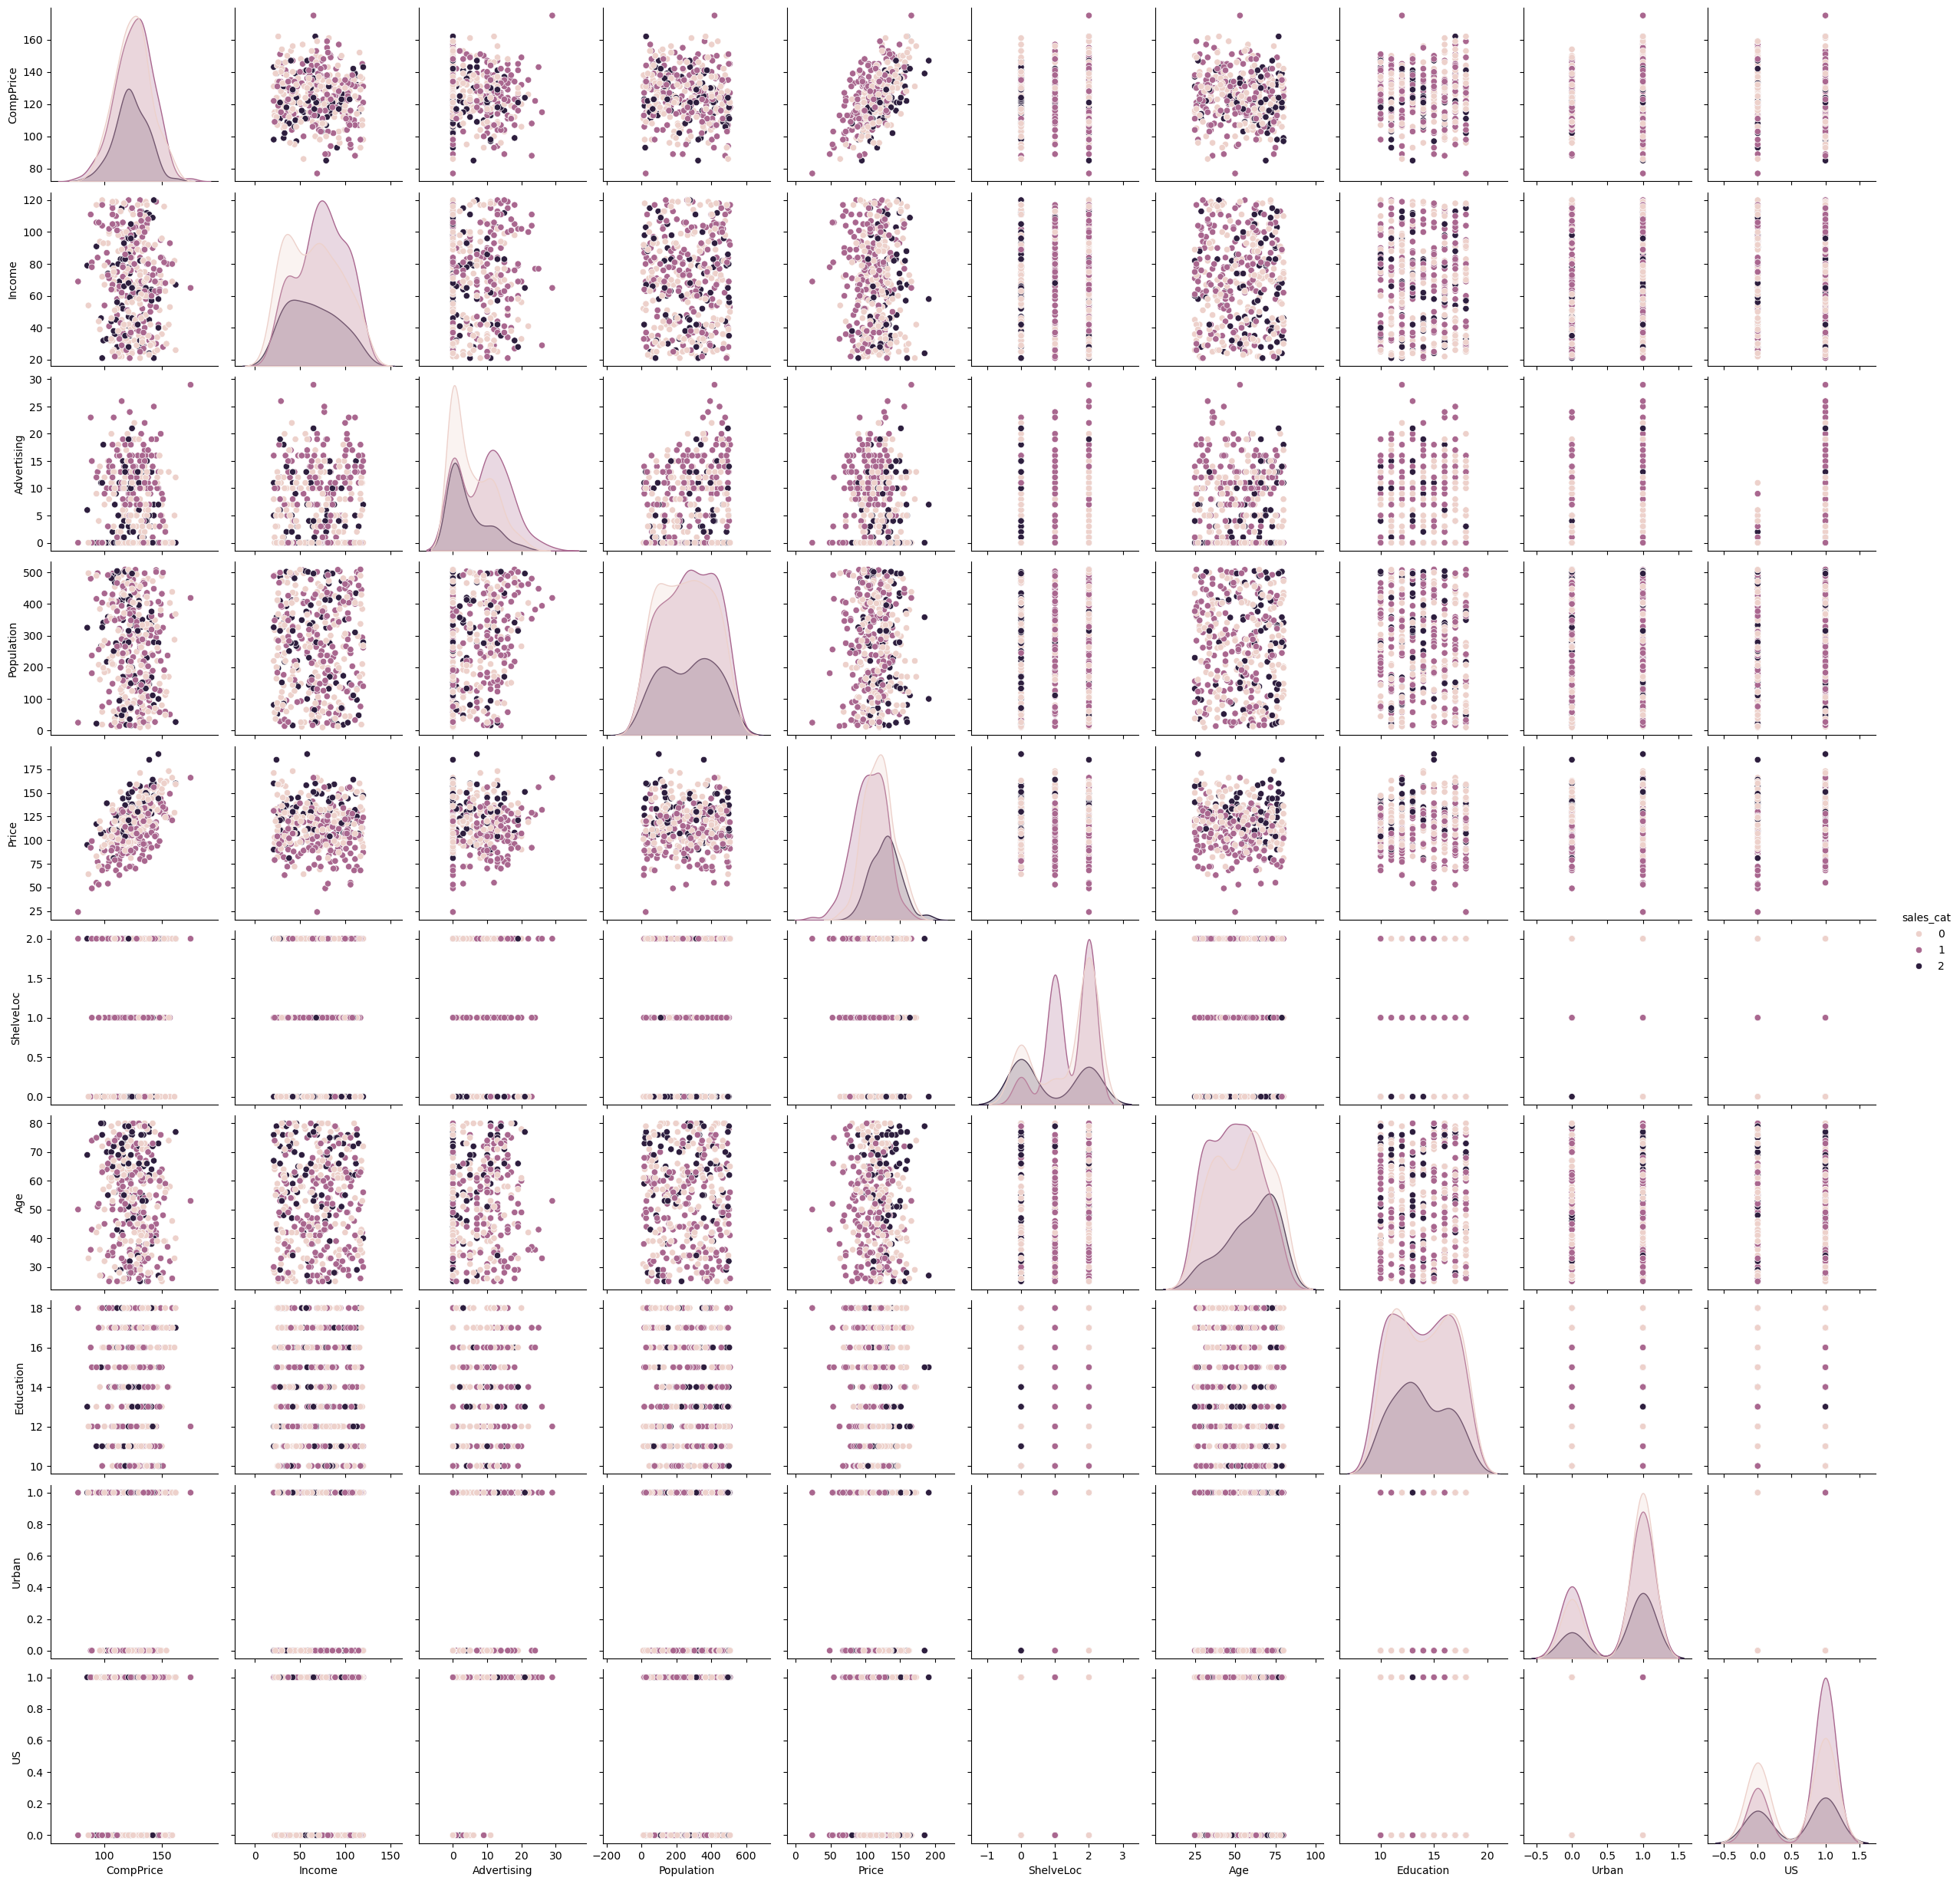

In [35]:
sns.pairplot(company_data_encoded ,hue ='sales_cat')
plt.savefig('D:/pairplot.png')